In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [29]:
# Step 1: Load the dataset
file_path = r'C:\Users\kartik\Desktop\bootcamp\ice_cream_sales.csv'
df = pd.read_csv(file_path)
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [31]:
# Step 2: Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64


In [33]:
# Display basic statistics
print("\nDataset description:\n", df.describe())


Dataset description:
        Temperature (°C)  Ice Cream Sales (units)
count         49.000000                49.000000
mean           0.271755                15.905308
std            2.697672                12.264682
min           -4.662263                 0.328626
25%           -2.111870                 4.857988
50%            0.688781                12.615181
75%            2.784836                25.142082
max            4.899032                41.842986


In [35]:
# Checking for column names
print("\nColumn names:\n", df.columns)


Column names:
 Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')


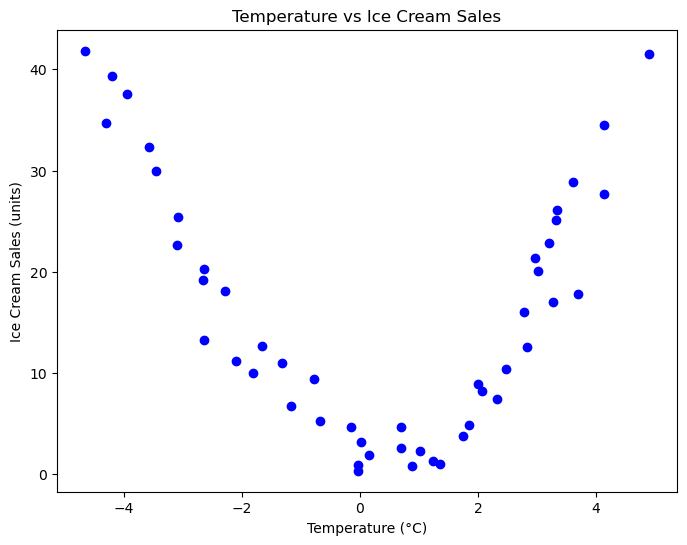

In [37]:
# Step 3: Exploratory Data Analysis (EDA)
# Scatter plot between Temperature and Ice Cream Sales
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], color='blue')
plt.title('Temperature vs Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [39]:
# Correlation between Temperature and Ice Cream Sales
correlation = df.corr()
print("\nCorrelation matrix:\n", correlation)


Correlation matrix:
                          Temperature (°C)  Ice Cream Sales (units)
Temperature (°C)                 1.000000                -0.175184
Ice Cream Sales (units)         -0.175184                 1.000000


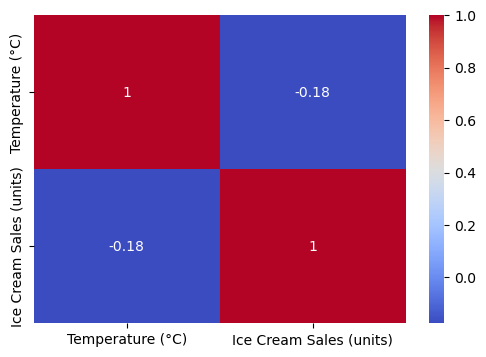

In [41]:
# Heatmap for correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

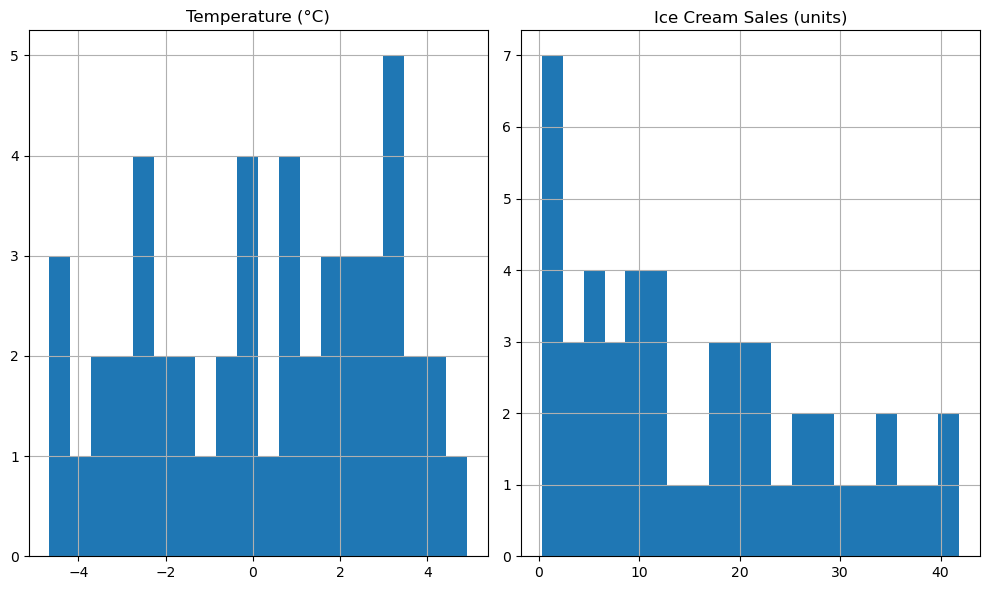

In [43]:
# Histograms of Temperature and Ice Cream Sales
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [45]:
# Step 4: Split Data into Training and Testing Sets
# Features and target
X = df[['Temperature (°C)']]  # Feature: Temperature
y = df['Ice Cream Sales (units)']  # Target: Ice Cream Sales

In [47]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Step 5: Model Building - Linear Regression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions
y_pred = model.predict(X_test)

In [57]:
# Step 6: Model Evaluation
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 149.32629119325182
R-squared: -0.5751270190188225


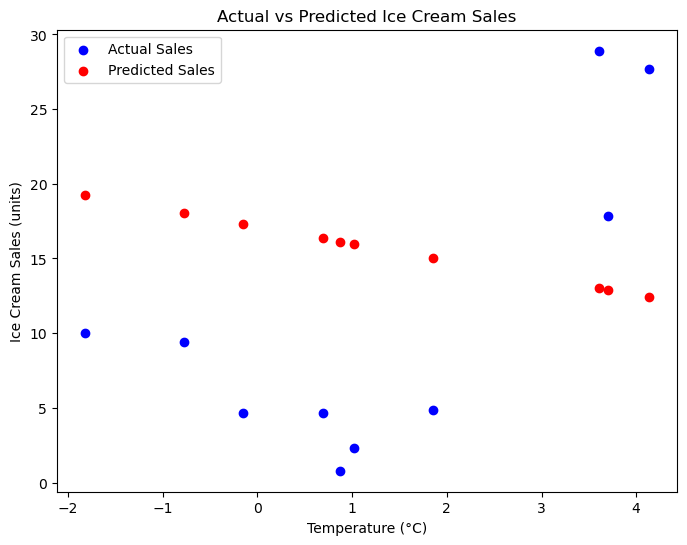

In [59]:
# Plot the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()

In [61]:
# Step 7: Insights and Conclusion
# Interpretation of the results
print("\nModel coefficients (slope):", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients (slope): [-1.14658686]
Model intercept: 17.139213127718417
